In [0]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

0it [00:00, ?it/s]

9920512it [00:01, 9299077.56it/s]                            


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 137192.28it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 2242103.61it/s]                            
0it [00:00, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 51850.69it/s]            


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [0]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

--2019-05-18 18:05:08--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [0]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))

# Define the loss
criterion = nn.CrossEntropyLoss()

# Get our data
images, labels = next(iter(trainloader))
print(images.shape)
# Flatten images
images = images.view(images.shape[0], -1)
print(images.shape)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
tensor(2.3286, grad_fn=<NllLossBackward>)


In [0]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1)
                      )

# Define the loss
loss = nn.NLLLoss()

# Get our data
images, labels = next(iter(trainloader))
print(images.shape)
# Flatten images
images = images.view(images.shape[0], -1)
print(images.shape)

# Forward pass, get our logits
logps= model(images)
# Calculate the loss with the logits and the labels
loss = loss(logps, labels)

print(loss)

torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
tensor(2.3092, grad_fn=<NllLossBackward>)


In [0]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0024,  0.0024,  0.0024,  ...,  0.0024,  0.0024,  0.0024],
        [-0.0049, -0.0049, -0.0049,  ..., -0.0049, -0.0049, -0.0049],
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        ...,
        [-0.0005, -0.0005, -0.0005,  ..., -0.0005, -0.0005, -0.0005],
        [ 0.0031,  0.0031,  0.0031,  ...,  0.0031,  0.0031,  0.0031],
        [-0.0025, -0.0025, -0.0025,  ..., -0.0025, -0.0025, -0.0025]])


In [0]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [0]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 0.0016, -0.0334, -0.0206,  ..., -0.0126,  0.0036, -0.0204],
        [-0.0248, -0.0169, -0.0002,  ..., -0.0320, -0.0100, -0.0289],
        [ 0.0302,  0.0175, -0.0268,  ...,  0.0333,  0.0292, -0.0053],
        ...,
        [-0.0086,  0.0175,  0.0293,  ...,  0.0124, -0.0315,  0.0172],
        [-0.0350,  0.0356,  0.0121,  ..., -0.0276, -0.0099, -0.0250],
        [ 0.0058, -0.0225, -0.0242,  ..., -0.0080, -0.0072, -0.0323]],
       requires_grad=True)
Gradient - tensor([[ 0.0017,  0.0017,  0.0017,  ...,  0.0017,  0.0017,  0.0017],
        [-0.0039, -0.0039, -0.0039,  ..., -0.0039, -0.0039, -0.0039],
        [ 0.0024,  0.0024,  0.0024,  ...,  0.0024,  0.0024,  0.0024],
        ...,
        [ 0.0059,  0.0059,  0.0059,  ...,  0.0059,  0.0059,  0.0059],
        [ 0.0012,  0.0012,  0.0012,  ...,  0.0012,  0.0012,  0.0012],
        [-0.0015, -0.0015, -0.0015,  ..., -0.0015, -0.0015, -0.0015]])


In [0]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)


Updated weights -  Parameter containing:
tensor([[ 0.0015, -0.0334, -0.0206,  ..., -0.0126,  0.0036, -0.0205],
        [-0.0248, -0.0169, -0.0002,  ..., -0.0320, -0.0099, -0.0289],
        [ 0.0302,  0.0175, -0.0268,  ...,  0.0333,  0.0292, -0.0054],
        ...,
        [-0.0087,  0.0174,  0.0292,  ...,  0.0124, -0.0316,  0.0171],
        [-0.0350,  0.0356,  0.0121,  ..., -0.0276, -0.0099, -0.0250],
        [ 0.0058, -0.0225, -0.0242,  ..., -0.0080, -0.0072, -0.0323]],
       requires_grad=True)


In [0]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.9894606656611347
Training loss: 0.9199215104140198
Training loss: 0.5585655207509426
Training loss: 0.4468488983635201
Training loss: 0.39465291642431005


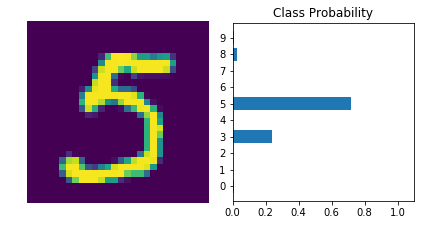

In [0]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)